In [1]:
import os
import numpy as np
import pyBigWig
import matplotlib.pyplot as plt

HMs = ["H3K4me3", "H3K27ac", "H3K4me1", "H3K36me3", "H3K9me3", "H3K27me3"]
dataset_dir = "../dataset/new/A549/"

In [2]:
class PvalueSignal:
    def __init__(self, name, scope):
        self.name = name
        self.bw = pyBigWig.open(self.getBigWigFile(dataset_dir))
        self.value = self.getSignal(scope)

    def getSignal(self, scope):
        raw_signal = self.bw.values(*scope, numpy=True)
        mean, std = np.mean(raw_signal), np.std(raw_signal)

        return (raw_signal - mean) / std

    def getBigWigFile(self, dataset_dir):
        dataset_dir = dataset_dir + name + "/"
        for f in os.listdir(dataset_dir):
            if f[-1] == "g":
                return dataset_dir + f

signals = []
scope = ["chr1", 100037079, 100039871]
for name in HMs:
    signals.append(PvalueSignal(name, scope))

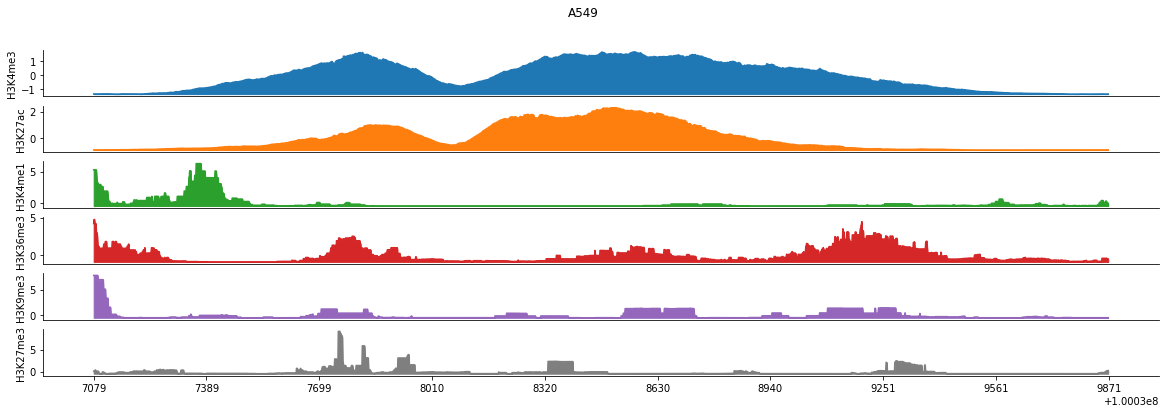

In [3]:
# Set figure
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(20,6))
subplot = [ax1, ax2, ax3, ax4, ax5, ax6]
color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:gray"]
fig.suptitle("A549")

for idx in range(6):
    # Plot signal
    subplot[idx].plot(range(scope[1], scope[2]), signals[idx].value, color=color[idx])
    # Fill the color under curve
    subplot[idx].fill_between(range(scope[1], scope[2]), min(signals[idx].value), signals[idx].value, color=color[idx])
    # Make x-axis empty
    subplot[idx].set_xticks([])
    # Set axis name
    subplot[idx].set_ylabel(signals[idx].name)
    # Eliminate some edges
    subplot[idx].spines["top"].set_visible(False)
    subplot[idx].spines["right"].set_visible(False)
else:
    # Set coordinate
    subplot[idx].set_xticks(np.linspace(scope[1], scope[2], 10))